# Extragem doar volumul hepatic de interes, bazat pe segmentarile corecte

In [1]:
from PIL import Image
import glob
import shutil
import os
import numpy as np
import nibabel as nib
import torchvision.transforms
from tqdm.notebook import tqdm
from matplotlib import pyplot as plt
import torch
import torchvision

from skimage.measure import label, regionprops

In [2]:
root_dir = "G:/MachineLearning/training-batch-1/training/"
image_files = sorted(glob.glob(root_dir + 'volume*.nii'))
mask_files = sorted(glob.glob(root_dir + 'segmentation*.nii'))

In [3]:
out_dir = "G:/MachineLearning/lesion-database/training/"

window_min = 0
window_max = 250

downsample = torchvision.transforms.Compose(
    [torchvision.transforms.ToPILImage(),
     torchvision.transforms.Resize(256, interpolation=torchvision.transforms.InterpolationMode.BILINEAR, antialias=True),
     torchvision.transforms.ToTensor()]
)
downsample_mask = torchvision.transforms.Compose(
    [torchvision.transforms.ToPILImage(),
     torchvision.transforms.Resize(256, interpolation=torchvision.transforms.InterpolationMode.NEAREST),
     torchvision.transforms.ToTensor()]
)

num_img = len(image_files)

for i in tqdm(range(num_img)):
    image = nib.load(image_files[i])
    image_data = image.get_fdata()


    image = nib.load(mask_files[i])
    mask_data = image.get_fdata()

    liver_mask = np.array(mask_data > 0.9, dtype=np.int8)
    image_data = np.multiply(image_data, liver_mask)
    num_slices = image_data.shape[2] # 512 x 512 x num_slices

    props = regionprops(liver_mask)
    (minx, miny, minz, maxx, maxy, maxz) = props[0].bbox

    crop_size = max(maxx - minx, maxy - miny) + 10
    crop_center = (int((maxx + minx) / 2), int((maxy + miny) / 2))

    bounds = [max(crop_center[0] - int(crop_size / 2), 0),
              min(crop_center[0] + int(crop_size / 2), image_data.shape[0]),
              max(crop_center[1] - int(crop_size / 2), 0),
              min(crop_center[1] + int(crop_size / 2), image_data.shape[1])]

    for j in tqdm(range(minz, maxz)):
        # Mai intai prelucram imaginea
        slc = image_data[bounds[0]:bounds[1], bounds[2]:bounds[3], j] # Taiem doar ce ne intereseaza
        slc[slc < window_min] = window_min
        slc[slc > window_max] = window_max
        slc = (slc - window_min) / (window_max - window_min)
        slc = downsample(slc.astype(np.float32)).numpy()
        slc.astype(np.float16).tofile(out_dir + "images/" + os.path.splitext(os.path.basename(image_files[i]))[0] + ("-%04d.ct" % j))

        # Acum si imaginea
        slc = mask_data[bounds[0]:bounds[1], bounds[2]:bounds[3], j] # Taiem doar ce ne intereseaza
        slc[slc < 1.5] = 0.0
        slc = downsample_mask(slc.astype(np.float32)).numpy()
        slc.astype(np.float16).tofile(out_dir + "masks/" + os.path.splitext(os.path.basename(image_files[i]))[0] + ("-%04d.ct" % j))

  0%|          | 0/121 [00:00<?, ?it/s]

  0%|          | 0/181 [00:00<?, ?it/s]

  0%|          | 0/276 [00:00<?, ?it/s]

  0%|          | 0/259 [00:00<?, ?it/s]

  0%|          | 0/313 [00:00<?, ?it/s]

  0%|          | 0/214 [00:00<?, ?it/s]

  0%|          | 0/194 [00:00<?, ?it/s]

  0%|          | 0/239 [00:00<?, ?it/s]

  0%|          | 0/168 [00:00<?, ?it/s]

  0%|          | 0/248 [00:00<?, ?it/s]

  0%|          | 0/205 [00:00<?, ?it/s]

  0%|          | 0/194 [00:00<?, ?it/s]

  0%|          | 0/167 [00:00<?, ?it/s]

  0%|          | 0/189 [00:00<?, ?it/s]

  0%|          | 0/233 [00:00<?, ?it/s]

  0%|          | 0/191 [00:00<?, ?it/s]

  0%|          | 0/170 [00:00<?, ?it/s]

  0%|          | 0/215 [00:00<?, ?it/s]

  0%|          | 0/186 [00:00<?, ?it/s]

  0%|          | 0/219 [00:00<?, ?it/s]

  0%|          | 0/260 [00:00<?, ?it/s]

  0%|          | 0/122 [00:00<?, ?it/s]

  0%|          | 0/132 [00:00<?, ?it/s]

  0%|          | 0/189 [00:00<?, ?it/s]

  0%|          | 0/120 [00:00<?, ?it/s]

  0%|          | 0/113 [00:00<?, ?it/s]

  0%|          | 0/118 [00:00<?, ?it/s]

  0%|          | 0/115 [00:00<?, ?it/s]

  0%|          | 0/112 [00:00<?, ?it/s]

  0%|          | 0/112 [00:00<?, ?it/s]

  0%|          | 0/113 [00:00<?, ?it/s]

  0%|          | 0/227 [00:00<?, ?it/s]

  0%|          | 0/292 [00:00<?, ?it/s]

  0%|          | 0/277 [00:00<?, ?it/s]

  0%|          | 0/142 [00:00<?, ?it/s]

  0%|          | 0/241 [00:00<?, ?it/s]

  0%|          | 0/139 [00:00<?, ?it/s]

  0%|          | 0/133 [00:00<?, ?it/s]

  0%|          | 0/187 [00:00<?, ?it/s]

  0%|          | 0/198 [00:00<?, ?it/s]

  0%|          | 0/189 [00:00<?, ?it/s]

  0%|          | 0/188 [00:00<?, ?it/s]

  0%|          | 0/194 [00:00<?, ?it/s]

  0%|          | 0/175 [00:00<?, ?it/s]

  0%|          | 0/46 [00:00<?, ?it/s]

  0%|          | 0/116 [00:00<?, ?it/s]

  0%|          | 0/118 [00:00<?, ?it/s]

  0%|          | 0/232 [00:00<?, ?it/s]

  0%|          | 0/192 [00:00<?, ?it/s]

  0%|          | 0/229 [00:00<?, ?it/s]

  0%|          | 0/98 [00:00<?, ?it/s]

  0%|          | 0/114 [00:00<?, ?it/s]

  0%|          | 0/123 [00:00<?, ?it/s]

  0%|          | 0/67 [00:00<?, ?it/s]

  0%|          | 0/119 [00:00<?, ?it/s]

  0%|          | 0/96 [00:00<?, ?it/s]

  0%|          | 0/98 [00:00<?, ?it/s]

  0%|          | 0/116 [00:00<?, ?it/s]

  0%|          | 0/89 [00:00<?, ?it/s]

  0%|          | 0/99 [00:00<?, ?it/s]

  0%|          | 0/96 [00:00<?, ?it/s]

  0%|          | 0/239 [00:00<?, ?it/s]

  0%|          | 0/90 [00:00<?, ?it/s]

  0%|          | 0/104 [00:00<?, ?it/s]

  0%|          | 0/115 [00:00<?, ?it/s]

  0%|          | 0/113 [00:00<?, ?it/s]

  0%|          | 0/113 [00:00<?, ?it/s]

  0%|          | 0/59 [00:00<?, ?it/s]

  0%|          | 0/41 [00:00<?, ?it/s]

  0%|          | 0/85 [00:00<?, ?it/s]

  0%|          | 0/69 [00:00<?, ?it/s]

  0%|          | 0/73 [00:00<?, ?it/s]

  0%|          | 0/64 [00:00<?, ?it/s]

  0%|          | 0/56 [00:00<?, ?it/s]

  0%|          | 0/56 [00:00<?, ?it/s]

  0%|          | 0/44 [00:00<?, ?it/s]

  0%|          | 0/29 [00:00<?, ?it/s]

  0%|          | 0/92 [00:00<?, ?it/s]

  0%|          | 0/91 [00:00<?, ?it/s]

  0%|          | 0/149 [00:00<?, ?it/s]

  0%|          | 0/83 [00:00<?, ?it/s]

  0%|          | 0/77 [00:00<?, ?it/s]

  0%|          | 0/79 [00:00<?, ?it/s]

  0%|          | 0/61 [00:00<?, ?it/s]

  0%|          | 0/89 [00:00<?, ?it/s]

  0%|          | 0/37 [00:00<?, ?it/s]

  0%|          | 0/104 [00:00<?, ?it/s]

  0%|          | 0/201 [00:00<?, ?it/s]

  0%|          | 0/36 [00:00<?, ?it/s]

  0%|          | 0/79 [00:00<?, ?it/s]

  0%|          | 0/64 [00:00<?, ?it/s]

  0%|          | 0/96 [00:00<?, ?it/s]

  0%|          | 0/110 [00:00<?, ?it/s]

  0%|          | 0/36 [00:00<?, ?it/s]

  0%|          | 0/58 [00:00<?, ?it/s]

  0%|          | 0/50 [00:00<?, ?it/s]

  0%|          | 0/32 [00:00<?, ?it/s]

  0%|          | 0/37 [00:00<?, ?it/s]

  0%|          | 0/75 [00:00<?, ?it/s]

  0%|          | 0/36 [00:00<?, ?it/s]

  0%|          | 0/59 [00:00<?, ?it/s]

  0%|          | 0/59 [00:00<?, ?it/s]

  0%|          | 0/76 [00:00<?, ?it/s]

  0%|          | 0/111 [00:00<?, ?it/s]

  0%|          | 0/170 [00:00<?, ?it/s]

  0%|          | 0/215 [00:00<?, ?it/s]

  0%|          | 0/258 [00:00<?, ?it/s]

  0%|          | 0/276 [00:00<?, ?it/s]

  0%|          | 0/280 [00:00<?, ?it/s]

  0%|          | 0/215 [00:00<?, ?it/s]

  0%|          | 0/175 [00:00<?, ?it/s]

  0%|          | 0/193 [00:00<?, ?it/s]

  0%|          | 0/183 [00:00<?, ?it/s]

  0%|          | 0/189 [00:00<?, ?it/s]

  0%|          | 0/179 [00:00<?, ?it/s]

  0%|          | 0/234 [00:00<?, ?it/s]

  0%|          | 0/252 [00:00<?, ?it/s]

  0%|          | 0/263 [00:00<?, ?it/s]

  0%|          | 0/299 [00:00<?, ?it/s]

  0%|          | 0/232 [00:00<?, ?it/s]

  0%|          | 0/241 [00:00<?, ?it/s]

  0%|          | 0/226 [00:00<?, ?it/s]

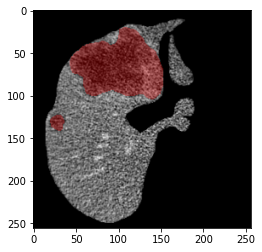

In [7]:
test_image = np.fromfile(out_dir + "images/volume-100-0516.ct", dtype=np.float16)
test_image = torch.tensor(np.squeeze(test_image).reshape((256, 256)))

test_mask = np.fromfile(out_dir + "masks/volume-100-0516.ct", dtype=np.float16)
test_mask = torch.tensor(np.squeeze(test_mask).reshape((256, 256)))

img = torchvision.utils.draw_segmentation_masks((test_image*255).repeat(3, 1, 1).type(torch.uint8),
                                                (test_mask).type(torch.bool), 0.3, "red")
plt.imshow(torch.permute(img, (2, 1, 0)))